## Running tensors and Pytorch objects on the gpus 

In [1]:
import torch

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Puttiing tensors (and models) on the GPU

In [3]:
# create a tensor on GPU
tensor = torch.tensor([1,2,3], device="cuda")
print(tensor, tensor.device)


tensor([1, 2, 3], device='cuda:0') cuda:0


In [4]:
# Alternative: move tensor to GPU or CPU
tensor_on_cpu = tensor.to("cpu")
tensor_on_cpu

tensor([1, 2, 3])

## Pytorch Workflow

In [15]:
from torch import nn # nn contains all of pytorch's building blocks
import matplotlib.pyplot as plt

## Data preparing and loading

In [16]:
# Creating a dataset from linear regression formula
# Create known parameters

weight = 0.75
bias = 0.25

# Linear regression => Y = b(weight)X + a(bias)

start = 0
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 


X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2500],
         [0.2650],
         [0.2800],
         [0.2950],
         [0.3100],
         [0.3250],
         [0.3400],
         [0.3550],
         [0.3700],
         [0.3850]]))

In [9]:
len(X), len(y)

(100, 100)

In [10]:
# spliting data into training and test set

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [17]:
# Function for visualizing our created dataset

def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediictions=None):
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # plot testiing data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # predictions
    if prediictions is not None:
        plt.scatter(test_data, prediictions, c='r', s=4, label='Predictions')

    plt.legend(prop={"size": 14})
    plt.show


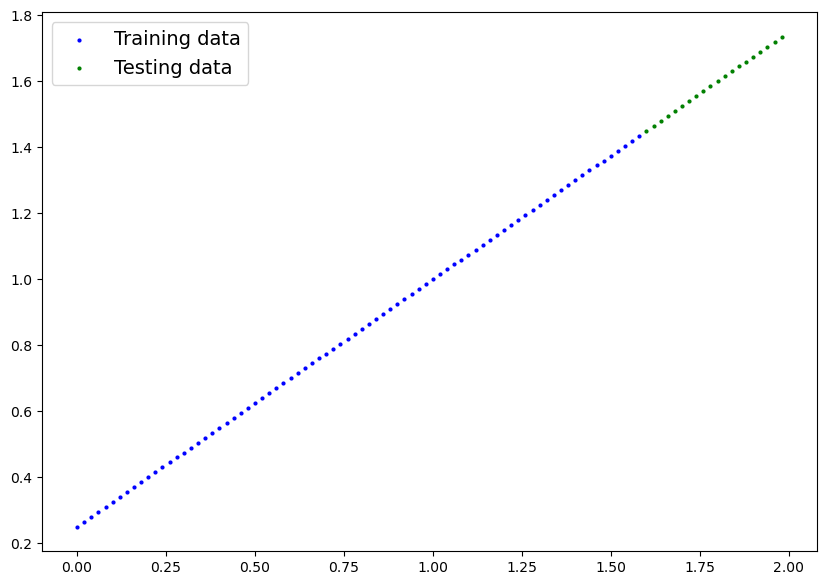

In [18]:
plot_prediction()

### Creating Pytorch model 